# Student Performance Indicator
Life cycle of machine learning Project
. Understanding the Problem Statement
. Data Collection
. Data checks to perform
. Exploratory data analysis
. Data Pre-Processing
. Model Training
. Choose best model

# Problem Statement
. This project understand how the student's performance(test scores) is affected by other variables such as Gender, Ethinicity, Parental level of education, Lunch and Test preperation course.

# Data Collection
. Dataset Source -
. The data consist of 8 columns and 100 rows.


# 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Waring Library. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Import the CSV Data as Pandas DataFrame

In [10]:
df = pd.read_csv("D:\\Data_Science\\Data_Science_Project\\ml_project\\notebook\\data\\student_performance.csv")

Show top 5 Records 

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [15]:
# shape of the data set

In [12]:
df.shape

(1000, 8)

# Dataset information
. gender : sex of student ->(Male/Female)
. race/ethinicity:ethinicity of student -> (Group A,B,C,D,E)
. Parental level of education: parent's final education -> (bachlor's degree,some college,master's degree,associate's degree,high school)
. lunch : having lunch before test (standard or free/reduced)
. test preperation course : complete or not complete before test
. math score
. reading score
. writing score

# 3. Data Checks to Perform

. Check missing values
. Check duplicates
. Check data type
. Check the Number of given unique values of each column
. Check statistics of data set
. Check various categories present in the different categorical column

# 3.1 Check missing values

In [13]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

# 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

There are no duplicate values in the data set

# 3.3 Check data types

In [19]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Checking the number of unique values of each column

In [20]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

# 3.5 Check Statistics of data set

In [21]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


# Insight
. From above description of numerical data, all means are very close to each other - between 66 and 68.5;
. All standard deviations are also close - between 14.6 and 15.19;
. While there is a minimum score 0 for math,for writing minimum is much higher = 10 and for reading myet higher = 17


# 3.7 Exploring Data

# 

In [22]:
print("categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethinicity' variable: ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df["test preparation course"].unique())


categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethinicity' variable:  ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:  ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['completed' 'none']


In [24]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != '0']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='0']

# print columns
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("\n We have {} Categorical features : {}".format(len(categorical_features),categorical_features))

We have 8 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

 We have 0 Categorical features : []


# 3.8 Adding columns for "total score" and "Average"

In [25]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [26]:
reading_full = df[df['reading score']== 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of student with full marks in Maths: {math_full}")
print(f"Number of student with full marks in Writing: {writing_full}")
print(f"Number of student with full marks in MReading: {reading_full}")

Number of student with full marks in Maths: 9
Number of student with full marks in Writing: 13
Number of student with full marks in MReading: 10


In [27]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['reading score'] <= 20]['average'].count()
math_less_20 = df[df['reading score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in Maths: {writing_less_20}")
print(f"Number of students with less than 20 marks in Maths: {reading_less_20}")

Number of students with less than 20 marks in Maths: 0
Number of students with less than 20 marks in Maths: 0
Number of students with less than 20 marks in Maths: 0


# Insights
. From above values we get students have performed the worst in Maths
. Best performance is in reading section

# 4. Exploring Data(Visualization)

# 4.1 Visualize average score distribution to make some conclusion.
. Histogram
. Kernel Distribution Function(KDE)


# 4.1.1 Histogram & KDE

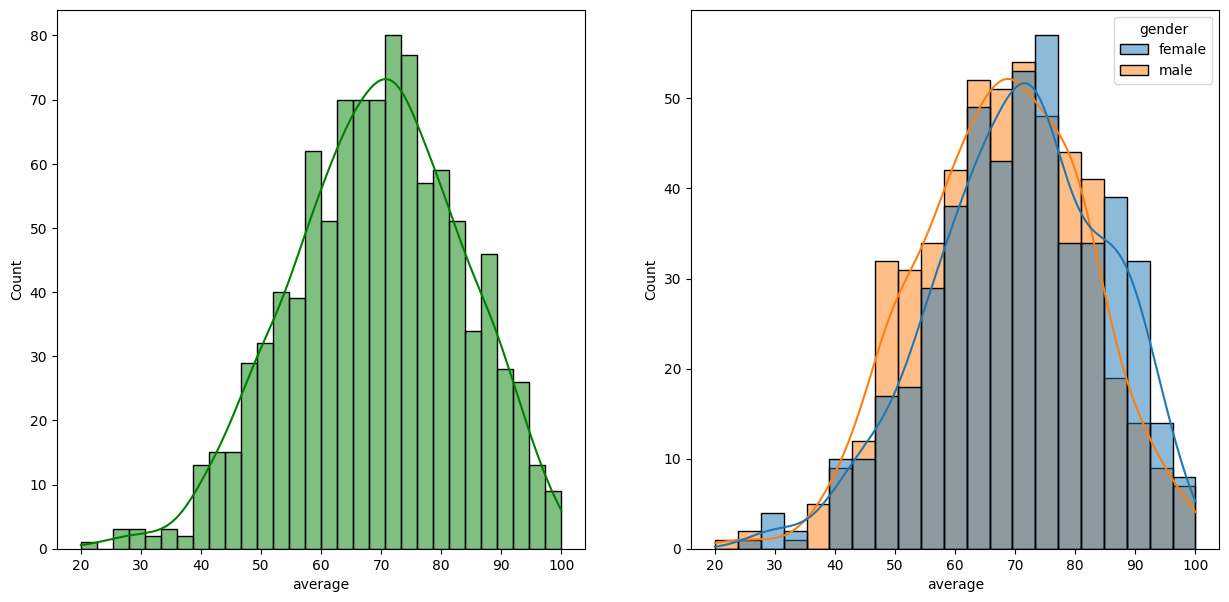

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

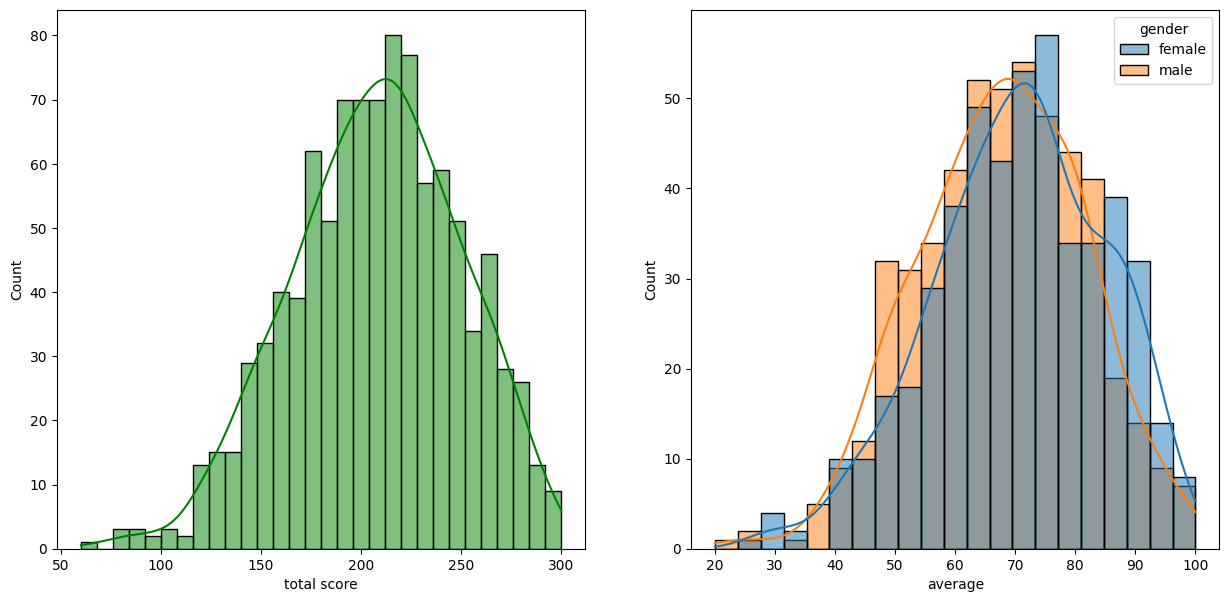

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

# Insights
. Male Students tend to perform well then Female Student

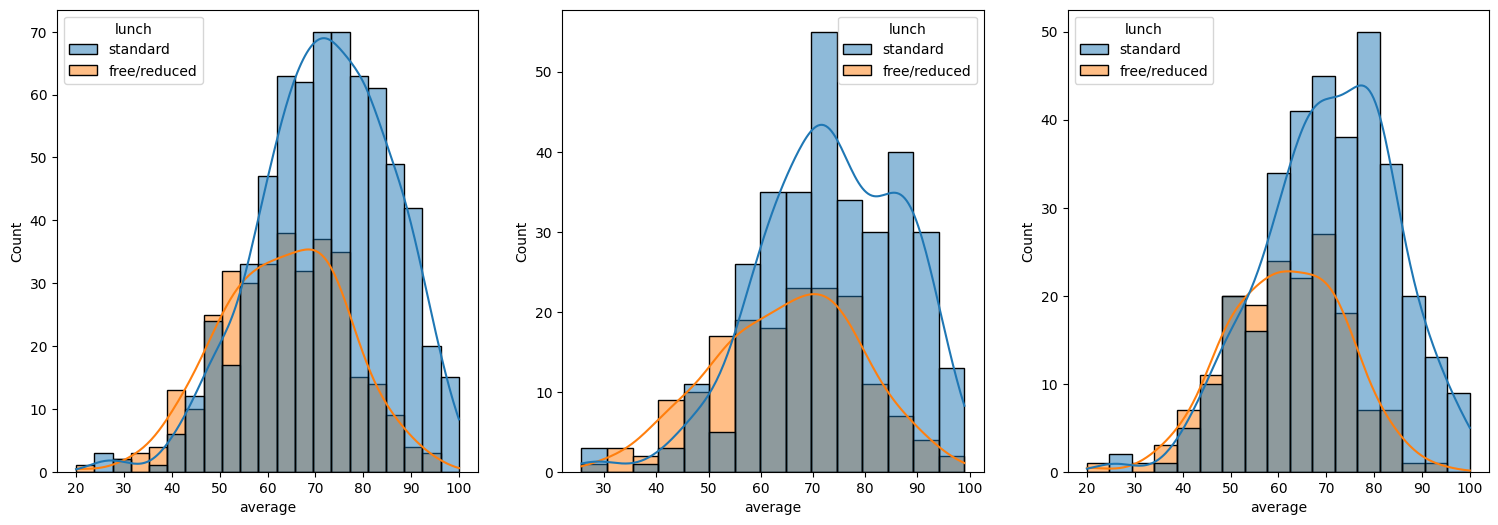

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

# Insights
. Standard lunch helps perform well in exams.
. Standard lunch perform well in exams be female.

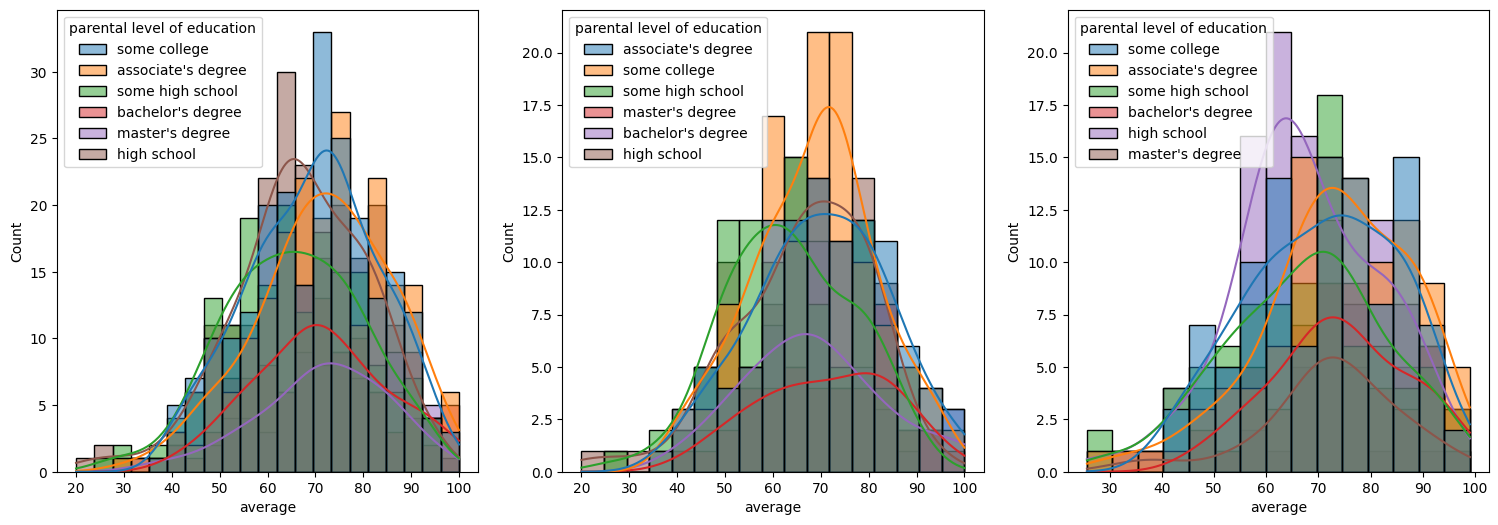

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

# Insights
. In general parent's education don't help student perform well in exam.
. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
. 3rd plot we can see there is no effect of parent's education on female students.